(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[8 0 2 5 6 5 4 5 8 0]


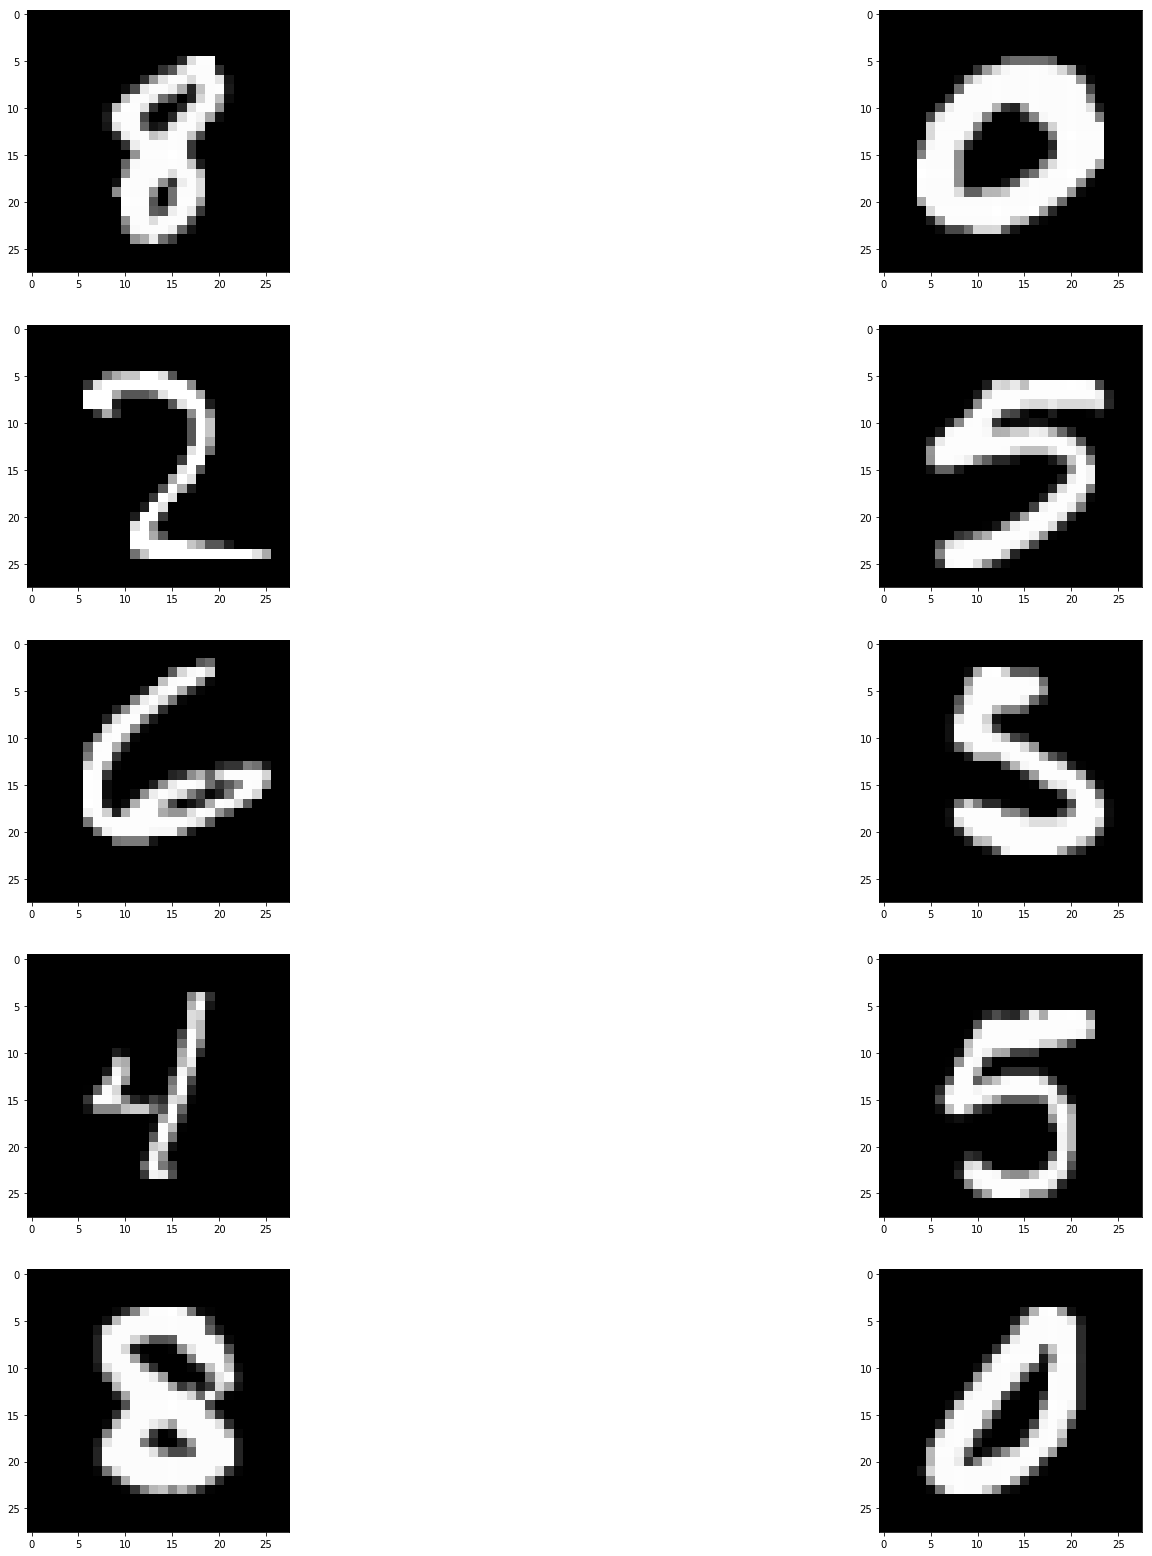

In [2]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import urllib.request

### Load data
def load_mnist(dir_path):
    URLS = [
        'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
        'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
    ]
    names = [os.path.basename(x) for x in URLS]
    out_gzs = [os.path.join(dir_path, x) for x in names]
    out_files = [x[:-3] for x in out_gzs]
    os.makedirs(dir_path, exist_ok=True)
    
    for i in range(len(URLS)):
        if not os.path.isfile(out_files[i]):
            print('Downloading {}...'.format(names[i]))
            urllib.request.urlretrieve(URLS[i], out_gzs[i])
            with gzip.open(out_gzs[i], 'rb') as fis:
                with open(out_files[i], 'wb') as fos:
                    shutil.copyfileobj(fis, fos)
                    
                    
                    
    intType = np.dtype('int32').newbyteorder('>')
    nMetaDataBytes = 4 * intType.itemsize
    X = []
    y = []
    for i in range(2):
        data = np.fromfile(out_files[2*i], dtype = 'ubyte')
        magicBytes, nImages, width, height = np.frombuffer(data[:nMetaDataBytes].tobytes(), 
                                                           intType)
        data = data[nMetaDataBytes:].astype(dtype='float32').reshape([nImages, width, height])
        labels = np.fromfile(out_files[2*i+1],
                             dtype='ubyte')[2*intType.itemsize:]
        X.append(data)
        y.append(labels)
    
    return X[0], y[0], X[1], y[1]

X_train, y_train, X_test, y_test = load_mnist('/tmp/data/mnist')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Display data
trp = np.random.choice(len(X_train), 10)
Xs, ys = X_train[trp], y_train[trp]
fig=plt.figure(figsize=(28, 28))
for i in range(5):
    for j in range(2):
        fig.add_subplot(5, 2, 2*i+j+1)
        plt.imshow(Xs[2*i+j], cmap='gray')

print(ys)
plt.show()